In [1]:
from lassonet import LassoNetClassifier
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [6]:
from sklearn.datasets import load_boston
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

from lassonet import LassoNetRegressor


dataset = load_boston()
X = dataset.data
y = dataset.target
_, true_features = X.shape
# add dummy feature
X = np.concatenate([X, np.random.randn(*X.shape)], axis=1)
feature_names = list(dataset.feature_names) + ["fake"] * true_features

# standardize
X = StandardScaler().fit_transform(X)
y = scale(y)


X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LassoNetRegressor(hidden_dims=(10,), verbose=False, patience=(100, 5))
path = model.path(X_train, y_train)



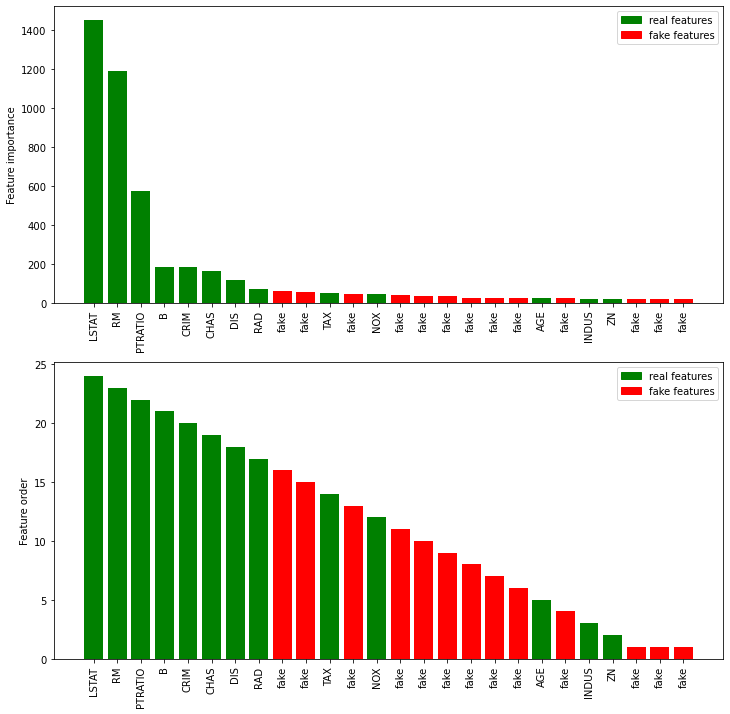

In [8]:
n_selected = []
mse = []
lambda_ = []

for save in path:
    model.load(save.state_dict)
    y_pred = model.predict(X_test)
    n_selected.append(save.selected.sum().cpu())
    mse.append(mean_squared_error(y_test, y_pred))
    lambda_.append(save.lambda_)


fig = plt.figure(figsize=(12, 12))

plt.subplot(311)
plt.grid(True)
plt.plot(n_selected, mse, ".-")
plt.xlabel("number of selected features")
plt.ylabel("MSE")

plt.subplot(312)
plt.grid(True)
plt.plot(lambda_, mse, ".-")
plt.xlabel("lambda")
plt.xscale("log")
plt.ylabel("MSE")

plt.subplot(313)
plt.grid(True)
plt.plot(lambda_, n_selected, ".-")
plt.xlabel("lambda")
plt.xscale("log")
plt.ylabel("number of selected features")

plt.savefig("boston.png")

plt.clf()

n_features = X.shape[1]
importances = model.feature_importances_.numpy()
order = np.argsort(importances)[::-1]
importances = importances[order]
ordered_feature_names = [feature_names[i] for i in order]
color = np.array(["g"] * true_features + ["r"] * (n_features - true_features))[order]


plt.subplot(211)
plt.bar(
    np.arange(n_features),
    importances,
    color=color,
)
plt.xticks(np.arange(n_features), ordered_feature_names, rotation=90)
colors = {"real features": "g", "fake features": "r"}
labels = list(colors.keys())
handles = [plt.Rectangle((0, 0), 1, 1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.ylabel("Feature importance")

_, order = np.unique(importances, return_inverse=True)

plt.subplot(212)
plt.bar(
    np.arange(n_features),
    order + 1,
    color=color,
)
plt.xticks(np.arange(n_features), ordered_feature_names, rotation=90)
plt.legend(handles, labels)
plt.ylabel("Feature order")

plt.savefig("boston-bar.png")


In [5]:
[i.cpu() for i in n_selected]

[tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),
 tensor(26),

In [2]:
import torch
torch.cuda.device_count()
print(torch.cuda.is_available())


True


In [ ]:
X, y = fetch_openml(name="mnist_784", return_X_y=True)

In [3]:
filter = y.isin(["5", "6"])
X = X[filter].values / 255
y = LabelEncoder().fit_transform(y[filter])

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [4]:

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [6]:
model = LassoNetClassifier(M=30, verbose=True)
path = model.path(X_train, y_train)

RuntimeError: CUDA error: no kernel image is available for execution on the device
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [3]:
from sklearn.datasets import fetch_openml
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

from lassonet import LassoNetClassifier

X, y = fetch_openml(name="mnist_784", return_X_y=True)
filter = y.isin(["5", "6"])
X = X[filter].values / 255
y = LabelEncoder().fit_transform(y[filter])

X_train, X_test, y_train, y_test = train_test_split(X, y)

model = LassoNetClassifier(M=30, verbose=True)
path = model.path(X_train, y_train)

img = model.feature_importances_.reshape(28, 28)

plt.title("Feature importance to discriminate 5 and 6")
plt.imshow(img)
plt.colorbar()
plt.savefig("mnist-classification-importance.png")

n_selected = []
accuracy = []
lambda_ = []

for save in path:
    model.load(save.state_dict)
    y_pred = model.predict(X_test)
    n_selected.append(save.selected.sum())
    accuracy.append(accuracy_score(y_test, y_pred))
    lambda_.append(save.lambda_)

to_plot = [160, 220, 300]

for i, save in zip(n_selected, path):
    if not to_plot:
        break
    if i > to_plot[-1]:
        continue
    to_plot.pop()
    plt.clf()
    plt.title(f"Linear model with {i} features")
    weight = save.state_dict["skip.weight"]
    img = (weight[1] - weight[0]).reshape(28, 28)
    plt.imshow(img)
    plt.colorbar()
    plt.savefig(f"mnist-classification-{i}.png")

fig = plt.figure(figsize=(12, 12))

plt.subplot(311)
plt.grid(True)
plt.plot(n_selected, accuracy, ".-")
plt.xlabel("number of selected features")
plt.ylabel("classification accuracy")

plt.subplot(312)
plt.grid(True)
plt.plot(lambda_, accuracy, ".-")
plt.xlabel("lambda")
plt.xscale("log")
plt.ylabel("classification accuracy")

plt.subplot(313)
plt.grid(True)
plt.plot(lambda_, n_selected, ".-")
plt.xlabel("lambda")
plt.xscale("log")
plt.ylabel("number of selected features")

plt.savefig("mnist-classification-training.png")

AttributeError: 'numpy.ndarray' object has no attribute 'isin'